In [3]:
import logging
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# input parameters
input_path=None
apply_on_path=None
output_path=None
replace_with=False

intensity_qmin=0.005

In [45]:
im1=np.load(input_path)
im2=np.load(apply_on_path)

In [47]:
intensity_min=np.quantile(im1.flatten(),intensity_qmin)
print(intensity_min)

6814.0


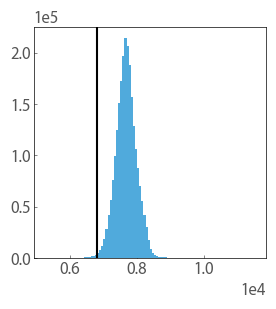

In [51]:
fig,ax=plt.subplots()
ax.hist(im1.flatten(),bins=100)
ax.axvline(intensity_min,color='k')

In [52]:
mask=im1<intensity_min
# im2=im1.astype(float).copy()
im3=im2.astype(float)
im3[mask]=replace_with

In [ ]:
for b in remove_regions:
    im3[b[1]:b[1]+b[3],b[0]:b[0]+b[2]]=replace_with

In [56]:
if im2.sum()<=im3.sum():
    logging.error("filtering not applied")

96983991

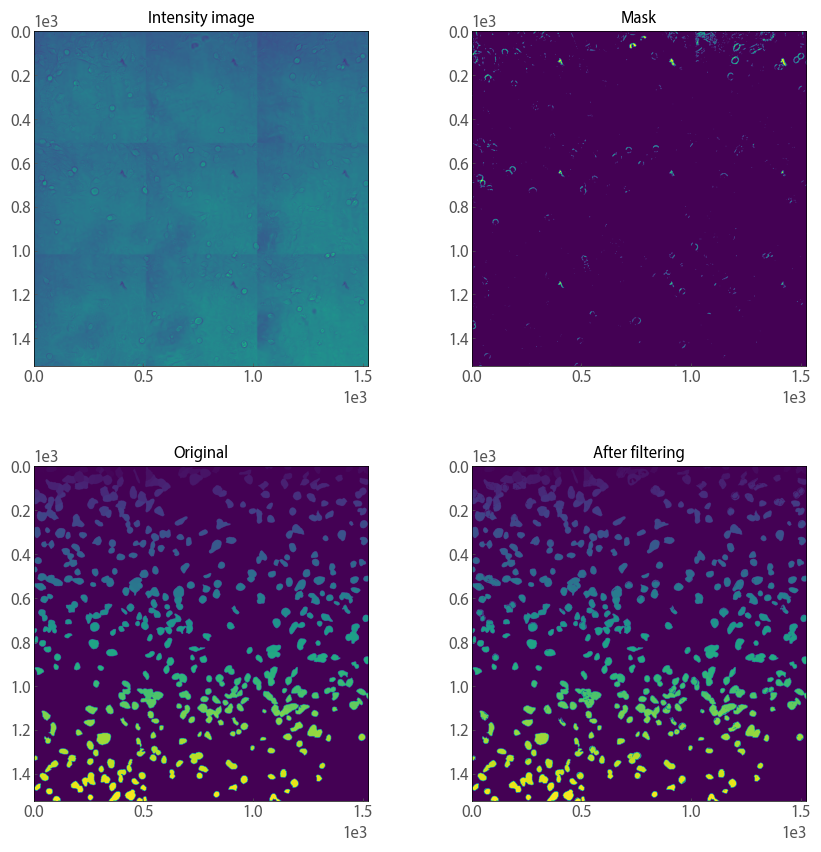

In [57]:
fig,axs=plt.subplots(2,2,figsize=[10,10])
for ax,(title,im) in zip(axs.flatten(),{'Intensity image':im1,'Mask':mask,'Original':im2,'After filtering':im3}.items()):
    # im=im.copy().astype(float)
    # for b in remove_regions:
    #     im[b[1]:b[1]+b[3],b[0]:b[0]+b[2]]=np.nan  
    ax.imshow(im)
    ax.set(title=title)

In [ ]:
np.save(
    output_path,
    im3,
)